In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
%matplotlib inline

In [2]:
poll_df=pd.read_csv("election-e-o.csv")
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [3]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


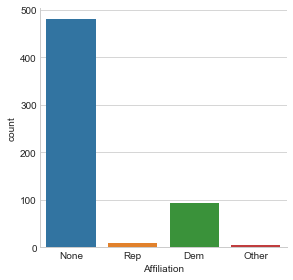

In [4]:
sb.factorplot("Affiliation",data=poll_df,kind="count")

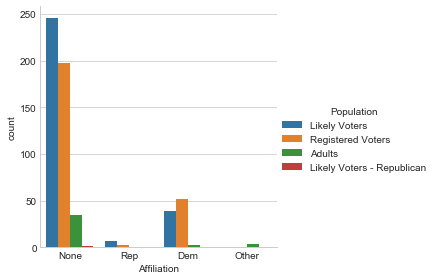

In [5]:
sb.factorplot("Affiliation",hue="Population", data=poll_df,kind="count")

In [6]:
avg=pd.DataFrame(poll_df.mean())
avg.drop("Number of Observations",axis=0,inplace=True)
avg.drop("Question Text",axis=0,inplace=True)
avg.drop("Question Iteration",axis=0,inplace=True)
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [7]:
std=pd.DataFrame(poll_df.std())
std.drop("Number of Observations",axis=0,inplace=True)
std.drop("Question Text",axis=0,inplace=True)
std.drop("Question Iteration",axis=0,inplace=True)
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


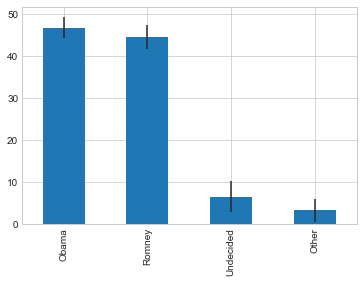

In [8]:
avg.plot(yerr=std,kind="bar",legend=False)

In [9]:
poll_avg=pd.concat([avg,std],axis=1)
poll_avg.columns=['Average','Std']
poll_avg

,Average,Std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


In [10]:
poll_df.head(3)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1


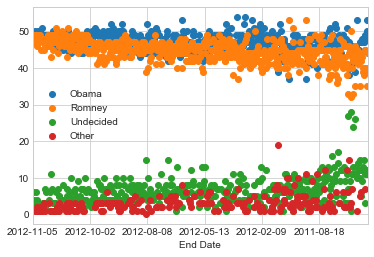

In [11]:
poll_df.plot(x="End Date",y=['Obama','Romney','Undecided','Other'],linestyle="",marker="o")

In [12]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [13]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


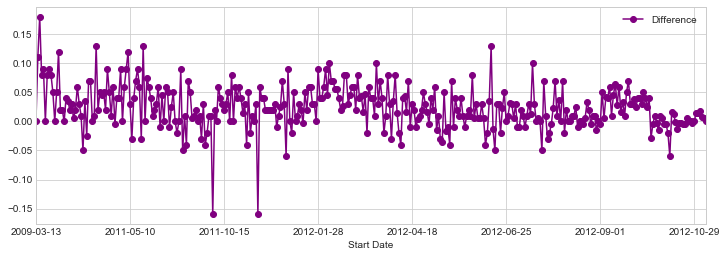

In [14]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [15]:
row_in = 0
xlimit = []
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print (min(xlimit))
print (max(xlimit))

325
352


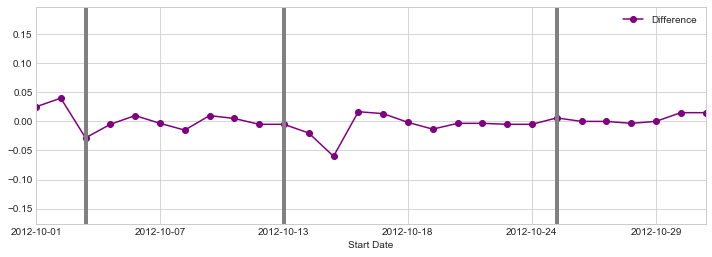

In [16]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))

plt.axvline(x=325+2, linewidth=4, color='grey')
plt.axvline(x=325+10, linewidth=4, color='grey')
plt.axvline(x=325+21, linewidth=4, color='grey')

In [18]:
donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26999 entries, 0 to 26998
Data columns (total 16 columns):
cmte_id              26999 non-null object
cand_id              26999 non-null object
cand_nm              26999 non-null object
contbr_nm            26999 non-null object
contbr_city          26997 non-null object
contbr_st            26999 non-null object
contbr_zip           26992 non-null float64
contbr_employer      26734 non-null object
contbr_occupation    26741 non-null object
contb_receipt_amt    26999 non-null float64
contb_receipt_dt     26999 non-null object
receipt_desc         986 non-null object
memo_cd              468 non-null object
memo_text            1052 non-null object
form_tp              26999 non-null object
file_num             26999 non-null int64
dtypes: float64(2), int64(1), object(13)
memory usage: 3.3+ MB


In [19]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-Jun-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,1-Aug-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166


In [20]:
donor_df['contb_receipt_amt'].value_counts()

 2500.00    5247
 1000.00    3265
 250.00     3208
 100.00     3031
 500.00     2681
 50.00      1786
 25.00      1223
 10.00       621
 200.00      593
 2000.00     421
 1500.00     375
 150.00      307
 300.00      240
 20.00       228
 35.00       221
 5.00        208
 30.00       206
 1250.00     170
 75.00       170
-2500.00     164
 110.00      135
 40.00       128
 5000.00     127
 55.00       126
 60.00       118
 20.12        91
 400.00       77
 125.00       67
-1000.00      62
 3.00         58
            ... 
 2433.19       1
 1895.00       1
-149.00        1
-165.43        1
 248.00        1
-17.50         1
 27.00         1
-21.00         1
-53.00         1
 329.00        1
 200.12        1
 94.50         1
 39.00         1
-1700.00       1
-1505.00       1
-550.00        1
 455.00        1
-4.50          1
 68.00         1
 165.72        1
 492.23        1
 25.78         1
 1979.88       1
 102.24        1
 253.00        1
 42.50         1
 107.00        1
 570.00       

In [21]:
don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()

print ('The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 795.24 with a std of 1025.68


In [25]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values()


13260   -5000.0
22232   -5000.0
13223   -5000.0
7361    -5000.0
21164   -5000.0
21167   -5000.0
21168   -5000.0
6944    -5000.0
1476    -5000.0
7973    -5000.0
25106   -5000.0
21172   -5000.0
13258   -5000.0
18240   -4000.0
25108   -3500.0
18723   -3000.0
13213   -2500.0
8003    -2500.0
22260   -2500.0
12133   -2500.0
10271   -2500.0
22227   -2500.0
8046    -2500.0
22223   -2500.0
19023   -2500.0
1062    -2500.0
22004   -2500.0
25409   -2500.0
13187   -2500.0
16937   -2500.0
          ...  
8044     5000.0
906      5000.0
7632     5000.0
9432     5000.0
10289    5000.0
16454    5000.0
23764    5000.0
10638    5000.0
8001     5000.0
22442    5000.0
15897    5000.0
12095    5000.0
12726    5000.0
14810    5000.0
21920    5000.0
21003    5000.0
19404    5000.0
8194     5000.0
26782    5000.0
25640    5000.0
16180    5000.0
10044    5000.0
21023    5000.0
20462    5000.0
15237    5000.0
16461    5000.0
19574    5000.0
21409    5000.0
11217    5000.0
25445    5000.0
Name: contb_receipt_amt,

In [27]:
top_donor = top_donor[top_donor >0]

top_donor.sort_values()

top_donor.value_counts().head(10)

2500.0    5247
1000.0    3265
250.0     3208
100.0     3031
500.0     2681
50.0      1786
25.0      1223
10.0       621
200.0      593
2000.0     421
Name: contb_receipt_amt, dtype: int64

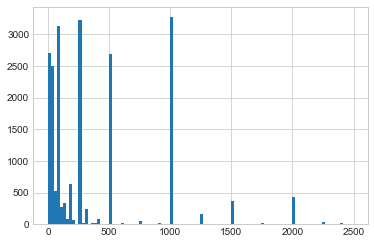

In [28]:
com_don = top_donor[top_donor < 2500]

com_don.hist(bins=100)

In [29]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt'], dtype=object)

In [30]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Romney, Mitt': 'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [31]:
donor_df = donor_df[donor_df.contb_receipt_amt >0]

donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-Jun-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,1-Aug-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166,Republican


In [32]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle      409
Romney, Mitt          26092
Name: contb_receipt_amt, dtype: int64

In [33]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle      177668.0
Romney, Mitt          21952083.5
Name: contb_receipt_amt, dtype: float64

In [35]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print (" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print ('\n')
    i += 1

 The candidate Bachmann, Michelle raised 177668 dollars 


 The candidate Romney, Mitt raised 21952083 dollars 




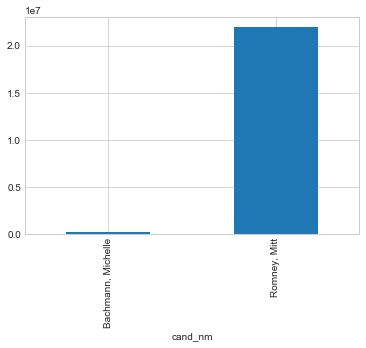

In [36]:
cand_amount.plot(kind='bar')

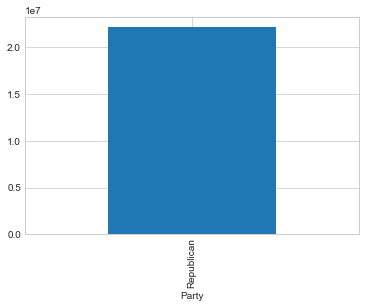

In [37]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [39]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')
occupation_df.head()

Party,Republican
contbr_occupation,
4106 E. FAIRVIEW CIRCLE,2000.00
A. P. FOOT AND ANKLE SPECIALIST,700.00
ACADEMIC,2500.00
ACCOUNT EXECUTIVE,1746.00
ACCOUNT MANAGER,5307.12


In [40]:
occupation_df.shape

(2335, 1)

In [41]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.shape

(4, 1)

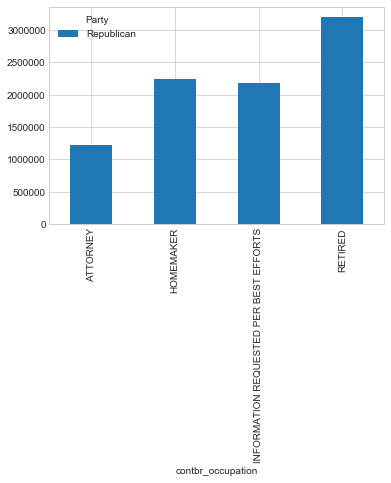

In [42]:
occupation_df.plot(kind='bar')

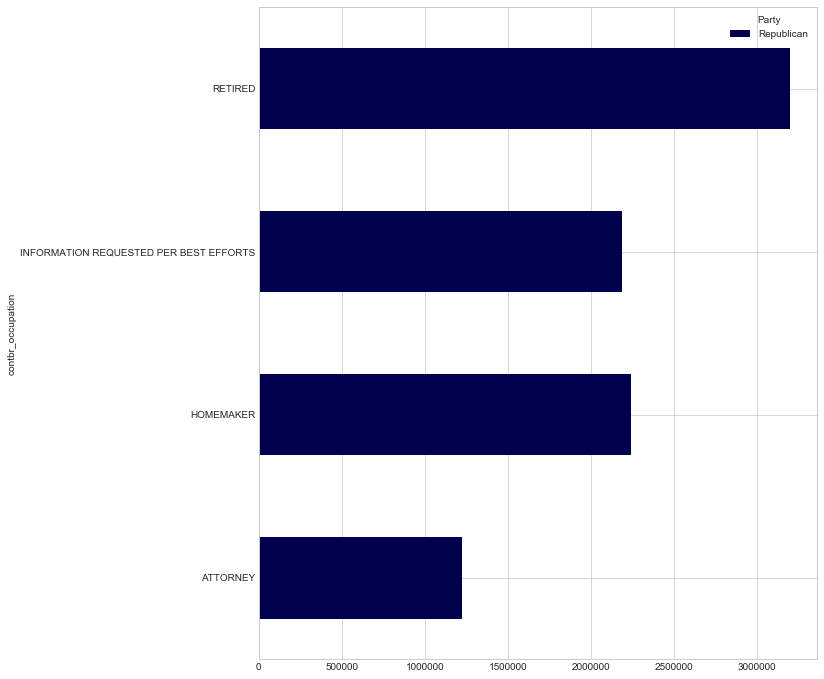

In [43]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')